# 파이토치 기본 문법 및 코드
- 아래 내용은 https://gaussian37.github.io/dl-pytorch-snippets/ 에서 참조하였습니다.

## 파이토치 기초

In [8]:
import torch
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
nums.shape

torch.Size([9])

In [10]:
type(nums)

torch.Tensor

In [11]:
"""텐서를 넘파이로 타입 변환"""
nums.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [12]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [13]:
nums = torch.arange(9).reshape(3,3)
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [14]:
nums+nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

### 텐서의 생성과 변환
- 텐서는 각 데이터의 형태별로 정의되어 있음
    - `torch.FloatTensor` : 32bit float point
    - `torch.LongTensor` : 64bit signed integer
- gpu 상에서 계산할 때에는 torch.cuda.FloatTensor를 사용 (일반적으로 Tensor는 FloatTensor를 의미)

In [16]:
import torch
import numpy as np

"""Tensor 생성"""
# 2차원 형태릐 list를 이용하여 텐서를 생성할 수 있습니다.
a = torch.tensor([[1,2],[3,4.]])
print(a, end='\n')
        
    
"""device 지정"""
# device를 지정하면 GPU에 텐서를 만들 수 있습니다.
b = torch.tensor([[1,2],[3,4.]], device="cuda:0")
print(b, end='\n')


"""dtype 지정"""
# dtype을 이용하여 텐서의 데이터 형태를 지정할 수도 있습니다.
c = torch.tensor([[1,2],[3,4.]], dtype=torch.float64)
print(c, end='\n')

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [19]:
"""torch.arange(n,m, step)"""
## arange를 이용한 1차원 텐서
a = torch.arange(1,10)
print(a)

"""cuda 지정"""
## 모든 값이 0인 3x5 텐서를 작성하여 to 메소드로 gpu에 전송
b = torch.zeros(3,5).to("cuda:0")
print(b)

## normal distribution으로 3x5 텐서를 작성
c = torch.randn(3,5)
print(c)

## 텐서의 shape은 size 메소드로 확인
t = torch.randn(3,4)
t.size()

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[ 0.9150,  0.9493, -0.9375,  0.1564,  0.7713],
        [-1.6483, -0.1843,  1.0245, -2.7374,  0.3429],
        [-0.0270, -0.4859,  1.5201,  0.2957, -1.5923]])


torch.Size([3, 4])

In [20]:
"""
- 텐서는 넘파이의 ndarray를 쉽게 변환할 수 있다.
- 단, GPU 상의 텐서는 그대로 변환할 수 없으며, cpu로 이동 후에 변환해야 한다.
"""

## 넘파이를 사용하여 ndarray로 변환
t = torch.tensor([[1,2], [3,4.]])
x = t.numpy()

## gpu 상의 텐서는 to 메소드로 cpu의 텐서로 변환한 후 ndarray로 변환해야 한다.
t = torch.tensor([[1,2], [3,4.]], device = "cuda:0")
x = t.to("cpu").numpy() # .to('cpu')

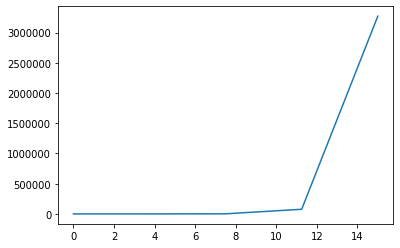

In [22]:
"""
torch.linspace(시작, 끝, step)
    - 시작과 끝을 포함하고 step의 갯수만큼 원소를 가진 등차 수열을 만든다.

torch에서 바로 이런 값들을 만들면 torch 내부적으로도 사용할 수 있지만 numpy와 호환되는 라이브러리에도 사용이 가능하다.
    - torch를 넘파이로 바꿀 수 있기 때문
"""

x = torch.linspace(0, 15, 5)
y = torch.exp(x)

## gpu 상이 아니기에 바로 넘파이로 전환 가능
import matplotlib.pyplot as plt
plt.plot(x.numpy(), y.numpy())

### 텐서의 인덱스 조작
- 여러가지 방법이 존재
- 넘파이의 ndarray와 같이 조작하는 것 가능
- 배열처럼 인덱스를 바로 지정 가능하고, 슬라이스, 마스크 배열을 사용할 수 있다.

In [26]:
t = torch.tensor([
    [1,2,3], [4,5,6]
])
print(t, end="\n\n")

## 인덱스 접근
print("t[0,2] :", t[0,2], end="\n\n")

## 슬라이스로 접근
print("t[:,:2] :", t[:,:2], end="\n\n")

## 마스크 배열을 이용하여 True 값만 추출
print("t[t>3] :", t[t>3], end="\n\n")

## 슬라이스를 이용하여 일괄 대입
t[: ,1] = 10
print(t, end="\n\n")

## 마스크 배열을 이용하여 일괄 대입
t[t>5] = 20
print(t, end="\n\n")

tensor([[1, 2, 3],
        [4, 5, 6]])

t[0,2] : tensor(3)

t[:,:2] : tensor([[1, 2],
        [4, 5]])

t[t>3] : tensor([4, 5, 6])

tensor([[ 1, 10,  3],
        [ 4, 10,  6]])

tensor([[ 1, 20,  3],
        [ 4, 20, 20]])



-----

### 텐서 연산
- 텐서 간에 타입이 다르면 연산이 되지 않는다. (FloatTensor와 DoubleTensor 간의 사칙연산을 오류가 발생한다.)
- 스칼라 값을 연산할 때에는 기본저긍로 broadcasting이 지원된다.

In [31]:
## 길이 3인 벡터
v = torch.tensor([1,2,3.])
w = torch.tensor([0, 10, 20])
print(v)
print(w, end='\n\n')


## 2 x 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])
print(m, end='\n\n')


"""단순 상수 연산 및 두 텐서간의 단순 연산은 모두 element wise하게 이루어진다."""
## 벡터와 스칼라의 덧셈
v2 = v + 10
print(v2, end='\n\n')


## 제곱
v2 = v ** 2
print(v2, end='\n\n')


## 동일 길이의 벡터간 덧셈 연산
z =  v - w
print(z, end='\n\n')

tensor([1., 2., 3.])
tensor([ 0, 10, 20])

tensor([[  0.,   1.,   2.],
        [100., 200., 300.]])

tensor([11., 12., 13.])

tensor([1., 4., 9.])

tensor([  1.,  -8., -17.])



In [35]:
print("v :", v, end='\n\n')
print("w :", w, end='\n\n')
print("m :", m, end='\n\n')

v : tensor([1., 2., 3.])

w : tensor([ 0, 10, 20])

m : tensor([[  0.,   1.,   2.],
        [100., 200., 300.]])



In [29]:
"""여러 가지 조합"""
u = 2 * v - w / 10 + 6.0
print(u, end='\n\n')

## 행렬과 스칼라 곱
m2 = m * 2.0
print(m2, end='\n\n')

## (2, 3)인 행렬과 (3,)인 벡터간의 덧셈이므로 브로드캐스팅 발생
    # (,3)인 벡터가 행렬의 각 행에 더해진다.
m + v
print(m + v, end='\n\n')
        
## 행렬 간 처리
print(m + m, end='\n\n')

tensor([ 8.,  9., 10.])

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])



-----

### 텐서의 차원 조작
- 텐서의 차원을 변경하는 `view`나 텐서를 결합하는 `stack`. `cat` 차원을 교환하는 `t`, `transpose`도 사용된다.
- `view`는 넘파이의 reshape과 유사하다. (reshape 사용 권장)
- `cat`은 다른 길이의 텐서를 하나로 묶을 때 사용
- `transpose`는 행렬의 전치 외에도 차원의 순서를 변경할 때에도 사용

In [37]:
"""2x2 행렬 생성"""
x1 = torch.tensor([[1, 2], [3, 4.]])
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]])

In [39]:
"""view() & reshape()"""
# 2 x 2 행렬을 4 x 1로 변형합니다.
print(x1.view(4,1))

# 2 x 2 행렬을 4 x 1로 변형합니다.
print(x1.reshape(4,1))

tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])


In [42]:
# 2 x 2 행렬을 1차원 벡터로 변형합니다.
print(x1.view(-1))
# 2 x 2 행렬을 1차원 벡터로 변형합니다.
print(x1.reshape(-1))

tensor([1., 2., 3., 4.])
tensor([1., 2., 3., 4.])


In [43]:
## -1을 사용하면 shape에서 자동 계산 가능한 부분에 한해서 자동으로 입력이 된다.
print(x1.view(1, -1))
print(x1.reshape(1, -1))

tensor([[1., 2., 3., 4.]])
tensor([[1., 2., 3., 4.]])


In [44]:
""".t()"""
## 2x3 행렬을 전치해서 3x2 행렬을 만든다.
print(x2.size())
x2.t()

tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])

In [51]:
""".cat(dim=)"""
## dim=1로 결합하면 2x5의 행렬로 묶을 수 있다.
print(x1, '\n',x2, '\n\n')
print(x1.shape, x2.shape, '\n\n')
x3 = torch.cat([x1, x2], dim=1)
print(x3, '\n', x3.shape)

tensor([[1., 2.],
        [3., 4.]]) 
 tensor([[10., 20., 30.],
        [40., 50., 60.]]) 


torch.Size([2, 2]) torch.Size([2, 3]) 


tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]]) 
 torch.Size([2, 5])


In [52]:
""".transpose()"""
## transpose(dim0, dim1)을 사용하면 dim0의 차원과 dim1의 차원을 교환한다.
## transpose(0, 3) 이라고 하면 0차원과 3차원을 교환한다.
img_ = torch.rand(100, 64, 32, 3)
t_img_ = img_.transpose(1,2).transpose(1,3) # 1차원과 2차원을 바꾼 뒤, 1차원과 3차원을 바꾼다.
t_img_.size()

torch.Size([100, 3, 64, 32])

----

### Tensor 생성
- 텐서를 생성할 때 대표적으로 사용하는 함수가 `rand`, `zeros`, `ones`이다.
- 이 때, 첫 인자는 dimension이다.
- 각 dimension은 tuple 형태로 묶어서 지정해 주어도 되고, 콤마 형태로 풀어서 지정해 주어도 된다.
- 예를 들어 torch.rand((2,3)), torch.rnad(2,3) 모두 같은 shape인 (2,3)을 가진다.

In [53]:
"""랜덤 넘버 생성"""
import torch
x = torch.rand(2,3)
print(x)

tensor([[0.9128, 0.0847, 0.8567],
        [0.0782, 0.9895, 0.7783]])


In [55]:
torch.torch.randperm(10)

tensor([6, 4, 8, 7, 5, 3, 2, 9, 1, 0])

In [58]:
""" torch.zeros(dim) & torch.zeros_like() : 모든 값이 0인 zeros tensor """
zeros = torch.zeros(2,3)
print(zeros, '\n\n')


torch.zeros_like(zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 




tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [59]:
"""torch.ones(dim) : 모든 값이 1인 텐서"""
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [60]:
"""torch.arange(시작, 끝, step) : np.arange()와 같음"""
torch.arange(0, 3, step=0.5)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])

-----

### Tensor 데이터 타입

In [61]:
"""Float 타입의 m행 n열 Tensor 생성하기"""
## 2행 3열의 Float 타입의 Tensor 생성하기
torch.cuda.FloatTensor(2,3) # device가 설정된 상태로 텐서 생성

tensor([[1., 2., 3.],
        [4., 0., 0.]], device='cuda:0')

In [62]:
"""리스트를 입력하여 특정 리스트를 Tensor로 변환"""
torch.cuda.FloatTensor([2,3])

tensor([2., 3.], device='cuda:0')

In [63]:
"""Float 타입을 Int 타입으로 형변환 (device는 그대로 유지)"""
x = torch.cuda.FloatTensor([2,3])
x.type_as(torch.cuda.IntTensor())

tensor([2, 3], device='cuda:0', dtype=torch.int32)

---

### Numpy to Tensor 또는 Tensor to Numpy
- 넘파이를 생성한 후 Tensor로 변환한 후 다시 Numpy로 변환해 보고, 추가적으로 변환하는 방법도 알아본다.

In [69]:
import numpy as np
x1 = np.ndarray(shape=(2,3), dtype = int, buffer=np.array([1,2,3,4,5,6]))
print('x1:', x1, type(x1), '\n')

"""Numpy to Tensor"""
x3 = torch.from_numpy(x1)
print('x3:', x3, type(x3))


"""Tensor to Numpy"""
x2 = torch.from_numpy(x1)
print(x2.numpy())

print(x2.float())

x1: [[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'> 

x3: tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32) <class 'torch.Tensor'>
[[1 2 3]
 [4 5 6]]
tensor([[1., 2., 3.],
        [4., 5., 6.]])


------

### CPU 타입과 GPU 타입의 Tensor
- 딥러닝 프레임워크에서는 cpu와 gpu 두 타입에 대한 Tensor 생성이 가능하다.
- 파이토치에서는 어떻게 사용할 수 있는지 알아본다.

In [70]:
"""아래의 3개 방법은 모두 같다. (이 외에도 텐서 생성시 device에서 바로 지정 가능)"""

""".cuda() : gpu에 올리기"""
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_gpu = x.cuda()
print(x_gpu)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [71]:
"""device 정의 후 .to(device) : gpu에 올리기"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_gpu = x.to(device)
print(x_gpu)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [73]:
""".to("cuda:0") : gpu에 올리기"""
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_gpu = x.to("cuda:0")
print(x_gpu)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [72]:
"""cpu 변환"""
x_cpu = x_gpu.cpu()
x_cpu

tensor([[1., 2., 3.],
        [4., 5., 6.]])

----

### Index(슬라이싱) 기능 사용
- 인덱스 또는 슬라이싱 기법은 텐서에서 특정 값만 조회하는 것을 의미

In [74]:
"""
아래의 방법은 자주 사용하지는 않는다.

torch.index_select(input, dim, index) : torch에서 제공하는 인덱싱 방법
"""

x = torch.rand(4,3)

torch.index_select(x,0,torch.LongTensor([0,2])) # 3번째 인자에는 torch.LongTensor를 이용하여 인덱스를 입력해 줍니다.

tensor([[0.6079, 0.3770, 0.2698],
        [0.8859, 0.3414, 0.3776]])

In [75]:
"""일반적인 인덱싱과 슬라이싱"""
print(x)

x[:, 0]

x[0, :]

x[0:2, 0:2]

tensor([[0.6079, 0.3770, 0.2698],
        [0.6857, 0.3781, 0.3689],
        [0.8859, 0.3414, 0.3776],
        [0.1869, 0.0880, 0.0417]])


tensor([[0.6079, 0.3770],
        [0.6857, 0.3781]])

In [ ]:
"""이번에는 mask 기능을 통하여 인덱싱 하는 방법에 대해서 살펴본다."""
x = torch.randn(2,3)

## mask는 0,1 값을 가지고 ByteTensor를 이용하여 생성합니다.
# (0,3)과 (1,1) 데이터 인덱싱
mask = torch.ByteTensor([[0,0,1],[0,1,0]])
torch.masked_select(x,mask)